<a href="https://colab.research.google.com/github/yeb2Binfang/ECE-GY-9163-ML-cyber/blob/main/Lab/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages and process data

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


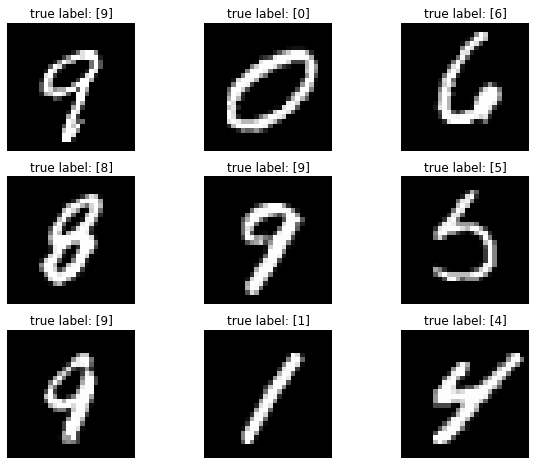

In [10]:
figure = plt.figure(figsize=(10,8))
cols, rows = 3,3
for i in range(1, cols*rows+1):
  index = np.random.randint(x_train.shape[0], size=1)
  img, label = (x_train[index], y_train[index])
  figure.add_subplot(rows, cols, i)
  plt.title("true label: {}".format(label))
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [13]:
DNN = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300, activation='relu'),
  tf.keras.layers.Dense(10)                                 
])

In [17]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [18]:
DNN.compile(optimizer='adam', loss=loss_fn,metrics=['accuracy'])

In [19]:
DNN.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2194 - accuracy: 0.9358
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0901 - accuracy: 0.9726
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0589 - accuracy: 0.9826
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0432 - accuracy: 0.9864
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0309 - accuracy: 0.9904


In [20]:
res = DNN.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0709 - accuracy: 0.9801 - 656ms/epoch - 2ms/step


In [22]:
def correct_classified(model, x_test, y_test):
  correct_classified_img = []
  correct_classified_img_label = []
  count = 0
  for i, img in enumerate(x_test):
    pred = model(img)
    pred = tf.nn.softmax(pred)
    pred = tf.math.argmax(pred, axis=1).numpy()
    if pred == y_test[i]:
      count+=1
      correct_classified_img.append(img)
      correct_classified_img_label.append(label)
  return count/x_test.shape[0], correct_classified_img, correct_classified_img_label

In [24]:
numOfCorrectClassified, correct_classified_img, correct_classified_img_label = correct_classified(DNN, x_test, y_test)

ValueError: ignored